In [ ]:
import os
os.chdir("/Users/678094/Desktop/Goodreads")

print(os.getcwd())

C:\Users\678094\Desktop\Goodreads


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from scipy.sparse import csr_matrix

In [ ]:
books = pd.read_csv('books.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')
bookTags = pd.read_csv('book_tags.csv')
toRead = pd.read_csv('to_read.csv')

In [ ]:
books.head()

id  book_id  best_book_id  work_id  books_count       isbn        isbn13  \
0   1  2767052       2767052  2792775          272  439023483  9.780439e+12   
1   2        3             3  4640799          491  439554934  9.780440e+12   
2   3    41865         41865  3212258          226  316015849  9.780316e+12   
3   4     2657          2657  3275794          487   61120081  9.780061e+12   
4   5     4671          4671   245494         1356  743273567  9.780743e+12   

                       authors  original_publication_year  \
0              Suzanne Collins                     2008.0   
1  J.K. Rowling, Mary GrandPré                     1997.0   
2              Stephenie Meyer                     2005.0   
3                   Harper Lee                     1960.0   
4          F. Scott Fitzgerald                     1925.0   

                             original_title  \
0                          The Hunger Games   
1  Harry Potter and the Philosopher's Stone   
2                                  Twilight   
3                     To Kill a Mockingbird   
4                          The Great Gatsby   

                         ...                         ratings_count  \
0                        ...                               4780653   
1                        ...                               4602479   
2                        ...                               3866839   
3                        ...                               3198671   
4                        ...                               2683664   

  work_ratings_count  work_text_reviews_count  ratings_1  ratings_2  \
0            4942365                   155254      66715     127936   
1            4800065                    75867      75504     101676   
2            3916824                    95009     456191     436802   
3            3340896                    72586      60427     117415   
4            2773745                    51992      86236     197621   

   ratings_3  ratings_4  ratings_5  \
0     560092    1481305    2706317   
1     455024    1156318    3011543   
2     793319     875073    1355439   
3     446835    1001952    1714267   
4     606158     936012     947718   

                                           image_url  \
0  https://images.gr-assets.com/books/1447303603m...   
1  https://images.gr-assets.com/books/1474154022m...   
2  https://images.gr-assets.com/books/1361039443m...   
3  https://images.gr-assets.com/books/1361975680m...   
4  https://images.gr-assets.com/books/1490528560m...   

                                     small_image_url  
0  https://images.gr-assets.com/books/1447303603s...  
1  https://images.gr-assets.com/books/1474154022s...  
2  https://images.gr-assets.com/books/1361039443s...  
3  https://images.gr-assets.com/books/1361975680s...  
4  https://images.gr-assets.com/books/1490528560s...  

[5 rows x 23 columns]

In [ ]:
books.shape    # 10.000 rows x 23 columns imported

(10000, 23)

In [ ]:
len(books.id.unique())  # There is information for 10.000 different books in total

10000

In [ ]:
# Book with the highest average rating:

books[['id', 'book_id', 'authors', 'title', 'average_rating', 'ratings_count']] \
     .sort_values('average_rating', ascending = False).head(20)

id   book_id                                          authors  \
3627  3628     24812                                   Bill Watterson   
3274  3275         8                      J.K. Rowling, Mary GrandPré   
861    862  17332218                                Brandon Sanderson   
8853  8854     95602                                  Francine Rivers   
7946  7947   5031805       Anonymous, Lane T. Dennis, Wayne A. Grudem   
4482  4483     24814                                   Bill Watterson   
6360  6361     70489                                   Bill Watterson   
421    422    862041                                     J.K. Rowling   
3752  3753        10                                     J.K. Rowling   
6919  6920     24815                                   Bill Watterson   
6589  6590     59715                                   Bill Watterson   
9565  9566     70487                                   Bill Watterson   
1307  1308  17927395                                    Sarah J. Maas   
8977  8978    121792                                   Bill Watterson   
9075  9076   2350129  The Church of Jesus Christ of Latter-day Saints   
7253  7254     24816                                   Bill Watterson   
5206  5207     24818                                   Bill Watterson   
5918  5919    265205      Anonymous, Ronald A. Beers, Ronald A. Beers   
9140  9141   9329354                                Brandon Sanderson   
2100  2101     99298                      J.K. Rowling, Mary GrandPré   

                                                  title  average_rating  \
3627                     The Complete Calvin and Hobbes            4.82   
3274  Harry Potter Boxed Set, Books 1-5 (Harry Potte...            4.77   
861      Words of Radiance (The Stormlight Archive, #2)            4.77   
8853                           Mark of the Lion Trilogy            4.76   
7946                                    ESV Study Bible            4.76   
4482  It's a Magical World: A Calvin and Hobbes Coll...            4.75   
6360  There's Treasure Everywhere: A Calvin and Hobb...            4.74   
421            Harry Potter Boxset (Harry Potter, #1-7)            4.74   
3752       Harry Potter Collection (Harry Potter, #1-6)            4.73   
6919                The Indispensable Calvin and Hobbes            4.73   
6589  The Authoritative Calvin and Hobbes: A Calvin ...            4.73   
9565  Attack of the Deranged Mutant Killer Monster S...            4.72   
1307  A Court of Mist and Fury (A Court of Thorns an...            4.72   
8977                        The Revenge of the Baby-Sat            4.71   
9075    Preach My Gospel: A Guide To Missionary Service            4.71   
7253  Homicidal Psycho Jungle Cat: A Calvin and Hobb...            4.71   
5206  The Days Are Just Packed: A Calvin and Hobbes ...            4.68   
5918                  Life Application Study Bible: NIV            4.67   
9140  The Way of Kings, Part 1 (The Stormlight Archi...            4.67   
2100  The Harry Potter Collection 1-4 (Harry Potter,...            4.66   

      ratings_count  
3627          28900  
3274          33220  
861           73572  
8853           9081  
7946           8953  
4482          22351  
6360          16766  
421          190050  
3752          24618  
6919          14597  
6589          16087  
9565           9713  
1307         108384  
8977          11503  
9075           9891  
7253          14113  
5206          19143  
5918          13614  
9140           9792  
2100          43929

In [ ]:
ratings.head()

book_id  user_id  rating
0        1      314       5
1        1      439       3
2        1      588       5
3        1     1169       4
4        1     1185       4

In [ ]:
ratings.shape  # 981.756 rows x 3 columns imported

(981756, 3)

In [ ]:
len(ratings.book_id.unique())  # There are ratings for 10.000 different books in total

10000

In [ ]:
len(ratings.user_id.unique())  # Ratings to these 10k books have been given by 53.424 unique users

53424

In [ ]:
tags.head()

tag_id tag_name
0       0        -
1       1     --1-
2       2    --10-
3       3    --12-
4       4   --122-

In [ ]:
tags.head()   # 34.252 rows x 2 columns importedtags.shape

tag_id tag_name
0       0        -
1       1     --1-
2       2    --10-
3       3    --12-
4       4   --122-

In [ ]:
len(tags.tag_id.unique())  # There are 34.252 different tags, which means no duplicates

34252

In [ ]:
bookTags.head()

goodreads_book_id  tag_id   count
0                  1   30574  167697
1                  1   11305   37174
2                  1   11557   34173
3                  1    8717   12986
4                  1   33114   12716

In [ ]:
bookTags.shape    # 999.912 rows imported x 3 columns imported

(999912, 3)

In [ ]:
len(bookTags.goodreads_book_id.unique())  # As expected, there are 10.000 books in total

10000

In [ ]:
len(bookTags.tag_id.unique())  # As expected, there are 34.252 different tags in total

34252

In [ ]:
toRead.head()

user_id  book_id
0        1      112
1        1      235
2        1      533
3        1     1198
4        1     1874

In [ ]:
toRead.shape    # 912.705 rows x 2 columns imported

(912705, 2)

In [ ]:
len(toRead.book_id.unique())  # 9.986 different books have been given the 'toRead' tag

9986

In [ ]:
len(toRead.user_id.unique())   # 48.871 unique users have used the 'toRead' tag to flag at least one the 10k books

48871

In [ ]:
maxRatings = pd.read_csv('maxRatings.csv')

In [ ]:
maxRatings.head()

Unnamed: 0                                 title  rating
0           0                    La ragazza di Bube       3
1           1                                 Crash       3
2           2     Flow My Tears, the Policeman Said       5
3           3                         Lost in Music       3
4           4  Things The Grandchildren Should Know       4

In [ ]:
maxRatings.shape    # 97 rows x 3 columns imported

(97, 3)

In [ ]:
max(ratings['user_id'])

53424

In [ ]:
maxRatings['user_id'] = 55000

In [ ]:
maxRatingsWithId = pd.merge(maxRatings, books, on = 'title')
maxRatingsWithId.head()

Unnamed: 0                              title  rating  user_id    id  \
0           1                              Crash       3    55000  7232   
1           2  Flow My Tears, the Policeman Said       5    55000  4326   
2           6      Chronicle of a Death Foretold       5    55000  1239   
3           7            The Taming of the Shrew       3    55000   773   
4           8             The Merchant of Venice       3    55000   839   

   book_id  best_book_id  work_id  books_count        isbn  \
0    70241         70241    68058           81   312420331   
1    22584         22584   949696           92  1857983416   
2    23878         23878    59137          269  140003471X   
3    47021         47021  3152341          689  074347757X   
4    24128         24128  2682703         1088   743477561   

                         ...                          ratings_count  \
0                        ...                                  13217   
1                        ...                                  22063   
2                        ...                                  56200   
3                        ...                                 126318   
4                        ...                                 115621   

  work_ratings_count  work_text_reviews_count ratings_1 ratings_2  ratings_3  \
0              15187                      925       825      1804       3900   
1              25396                     1187       206      1104       6014   
2              81653                     3996       955      4077      18369   
3             134240                     2370      2869      9611      35666   
4             128289                     2616      1925      9212      36917   

   ratings_4  ratings_5                                          image_url  \
0       5091       3567  https://images.gr-assets.com/books/1281416649m...   
1      10985       7087  https://images.gr-assets.com/books/1398026028m...   
2      33190      25062  https://images.gr-assets.com/books/1430736599m...   
3      47453      38641  https://images.gr-assets.com/books/1327935253m...   
4      46745      33490  https://images.gr-assets.com/books/1327871054m...   

                                     small_image_url  
0  https://images.gr-assets.com/books/1281416649s...  
1  https://images.gr-assets.com/books/1398026028s...  
2  https://images.gr-assets.com/books/1430736599s...  
3  https://images.gr-assets.com/books/1327935253s...  
4  https://images.gr-assets.com/books/1327871054s...  

[5 rows x 26 columns]

In [ ]:
ratings.head()

book_id  user_id  rating
0        1      314       5
1        1      439       3
2        1      588       5
3        1     1169       4
4        1     1185       4

In [ ]:
maxRatingsWithId = maxRatingsWithId[['id', 'user_id', 'rating']] \
                    .rename(columns = {'id' : 'book_id'})

In [ ]:
maxRatingsWithId.head()

book_id  user_id  rating
0     7232    55000       3
1     4326    55000       5
2     1239    55000       5
3      773    55000       3
4      839    55000       3

In [ ]:
ratings = ratings.append(maxRatingsWithId)

In [ ]:
len(ratings.user_id.unique())    # As expected, now ratings has one more unique user id

53425

In [ ]:
# The following table will show which pair of user-book have more than 1 rating in the dataset:

userRatesPerBookCount = ratings.groupby(['user_id', 'book_id'], as_index = False).count().sort_values('rating', ascending = False)
userRatesPerBookCount.head(15)

user_id  book_id  rating
59787      3204     8946       5
95001      5091     8946       4
572          42     8946       4
42643      2308     8946       4
665335    34548     7420       4
729574    38259     3996       4
81315      4359     2515       4
11033       691     6472       4
20901      1248     8946       3
468001    23851     3848       3
65320      3498     9858       3
245762    12419     2885       3
859617    46106     1729       3
799013    42277     7087       3
54390      2935     8946       3

In [ ]:
# Let's double check if this is true:

ratings[(ratings.user_id == 3204) & (ratings.book_id == 8946)]

book_id  user_id  rating
883706     8946     3204       5
883707     8946     3204       5
883708     8946     3204       5
883709     8946     3204       5
883710     8946     3204       4

In [ ]:
# Here I calculate the rating mean per user and book, so that I can later replace the mean to the rating value
# and get rid of the duplicates rows

userRatesPerBookMean = ratings.groupby(['user_id', 'book_id'], as_index = False).mean().round(0).sort_values('rating', ascending = False)
userRatesPerBookMean.head(15)

user_id  book_id  rating
354506    17855     8511     5.0
386280    19581     9665     5.0
821433    43668     1336     5.0
821434    43668     1473     5.0
821435    43668     1483     5.0
821437    43668     1513     5.0
821438    43668     1556     5.0
821439    43668     1585     5.0
821442    43668     1840     5.0
821444    43668     1932     5.0
386282    19581     9856     5.0
821448    43668     2237     5.0
386279    19581     9615     5.0
821431    43668     1297     5.0
386278    19581     9589     5.0

In [ ]:
# Let's double check if that worked ok:

userRatesPerBookMean[(userRatesPerBookMean.user_id == 3204) & (userRatesPerBookMean.book_id == 8946)]

user_id  book_id  rating
59787     3204     8946     5.0

In [ ]:
# We create now a table grouped by user and book pair, calculating mean and number of rating that a user has made for the
# same book

ratings['count'] = ratings['rating']

userRatesPerBook = ratings.groupby(['user_id', 'book_id'], as_index = False) \
                   .agg({'rating' : 'mean', 'count' : 'count'}) \
                   .rename(columns = {'rating':'mean'}) \
                   .sort_values('count', ascending = False)

ratings = ratings.drop(['count'], axis = 1)

userRatesPerBook['mean'] = userRatesPerBook['mean'].round(0)
userRatesPerBook.head()

user_id  book_id  mean  count
59787      3204     8946   5.0      5
95001      5091     8946   5.0      4
572          42     8946   5.0      4
42643      2308     8946   5.0      4
665335    34548     7420   5.0      4

In [ ]:
# Now I append the mean and count per each user and book to the ratings table:

ratings = pd.merge(ratings, userRatesPerBook, on = ['user_id', 'book_id'])
ratings.head()

book_id  user_id  rating  mean  count
0        1      314       5   5.0      1
1        1      439       3   3.0      1
2        1      588       5   5.0      1
3        1     1169       4   4.0      1
4        1     1185       4   4.0      1

In [ ]:
ratings.sort_values('count', ascending = False).head(15)

book_id  user_id  rating  mean  count
883708     8946     3204       5   5.0      5
883706     8946     3204       5   5.0      5
883709     8946     3204       5   5.0      5
883707     8946     3204       5   5.0      5
883710     8946     3204       4   5.0      5
251243     2515     4359       5   5.0      4
251242     2515     4359       5   5.0      4
251241     2515     4359       5   5.0      4
251244     2515     4359       5   5.0      4
883700     8946     2308       5   5.0      4
644169     6472      691       5   5.0      4
736957     7420    34548       5   5.0      4
736956     7420    34548       5   5.0      4
736955     7420    34548       5   5.0      4
736954     7420    34548       5   5.0      4

In [ ]:
ratings.shape    # 981.820 rows x 5 columns

(981819, 5)

In [ ]:
# We can now drop the duplicates records for the combination user/book with more than 1 rating

ratings = ratings.drop_duplicates(subset = ['book_id', 'user_id'], keep = 'first', inplace = False)\
                                  .sort_values('count', ascending = False)

In [ ]:
ratings = ratings.drop(['rating', 'count'], axis = 1)

In [ ]:
ratings.head()

book_id  user_id  mean
883706     8946     3204   5.0
883651     8946       42   5.0
251241     2515     4359   5.0
644166     6472      691   5.0
883717     8946     5091   5.0

In [ ]:
ratings.shape  # 979.542 rows x 3 columns: 2.278 records removed

(979541, 3)

In [ ]:
# I restore the 'ratings' table column names as they were prior to the modification I have made
ratings.columns = ['book_id', 'user_id', 'rating']

In [ ]:
ratings.columns

Index(['book_id', 'user_id', 'rating'], dtype='object')

In [ ]:
ratesPerUser = ratings[['user_id', 'rating']].groupby(['user_id'], as_index = False) \
                      .count() \
                      .rename(columns = {'rating' : 'totalRatings'}) \
                      .sort_values('totalRatings', ascending = False)

ratesPerUser.head(10)

user_id  totalRatings
12873    12874           200
30943    30944           200
52035    52036           199
28157    28158           199
12380    12381           199
45553    45554           197
6629      6630           197
19728    19729           196
24142    24143           196
15603    15604           196

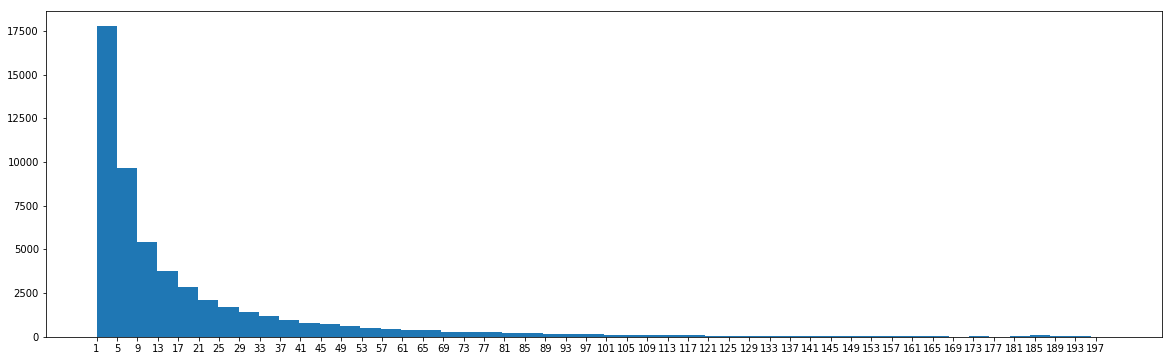

In [ ]:
plt.rcParams['figure.figsize'] = [20, 6]
plt.hist(ratesPerUser['totalRatings'], bins = 50)
plt.xticks(np.arange(min(ratesPerUser['totalRatings']), max(ratesPerUser['totalRatings'])+1, 4.0))
plt.show()

In [ ]:
ratings = pd.merge(ratings, ratesPerUser, on = ['user_id'])

In [ ]:
ratings.sort_values('totalRatings', ascending = False).head(10)

book_id  user_id  rating  totalRatings
977744       21    30944     3.0           200
488867      102    12874     2.0           200
488856      576    12874     2.0           200
488857      579    12874     3.0           200
488858      485    12874     3.0           200
488859      498    12874     3.0           200
488860      497    12874     3.0           200
488861      465    12874     4.0           200
488862      479    12874     3.0           200
488863      471    12874     3.0           200

In [ ]:
# Keeping only users with more than a 'minimum' of ratings
minimumRatings = ratings.totalRatings <= 20
np.sum(minimumRatings)

272086

In [ ]:
ratings = ratings[-minimumRatings]
len(ratings)   # only 707.456 ratings have been kept

707455

In [ ]:
len(ratings.user_id.unique())  # total of remaining users after removing the ones with less than the established minimum

13972

In [ ]:
len(ratings.book_id.unique())  # total of remaining books after removing users with less than the established minimum

9998

In [ ]:
ratesPerBook = ratings[['book_id', 'rating']].groupby(['book_id'], as_index = False) \
                      .count() \
                      .rename(columns = {'rating' : 'receivedRatings'}) \
                      .sort_values('receivedRatings', ascending = False)

ratesPerBook.tail()

book_id  receivedRatings
9342     9345                2
9855     9858                1
9087     9090                1
8802     8804                1
8371     8372                1

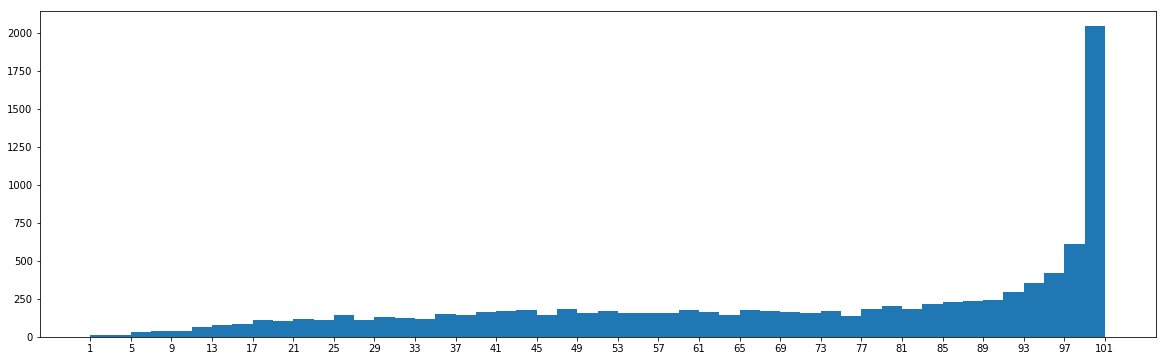

In [ ]:
plt.rcParams['figure.figsize'] = [20, 6]
plt.hist(ratesPerBook['receivedRatings'], bins = 50)
plt.xticks(np.arange(min(ratesPerBook['receivedRatings']), max(ratesPerBook['receivedRatings'])+1, 4.0))
plt.show()

In [ ]:
ratings = pd.merge(ratings, ratesPerBook, on = ['book_id'])

In [ ]:
# Keeping only books with more than a 'minimum' of ratings received

minimumReceived = ratings.receivedRatings < 30
np.sum(minimumReceived)

21710

In [ ]:
ratings = ratings[-minimumReceived]
len(ratings)

685745

In [ ]:
len(ratings.user_id.unique())   # total of remaining users after removing the ones with less than the established minimum

13971

In [ ]:
len(ratings.book_id.unique())    # total of remaining books after removing the ones with less than the established minimum

8885

In [ ]:
ratings.shape

(685745, 5)

In [ ]:
# For illustrative purpose, let's first grab author and title for the books dataset:
showingTitles = pd.merge(ratings, books[['id', 'authors', 'title']], how = 'left', left_on = ['book_id'], right_on = ['id'])

In [ ]:
topRated = showingTitles.groupby(['book_id'], as_index = False) \
                      .agg({'rating' : 'mean', \
                           'authors': 'first', \
                           'title' : 'first'})
topRated.sort_values('rating', ascending = False).head(10)

book_id    rating                                            authors  \
6631     6920  4.806452                                     Bill Watterson   
8622     9566  4.800000                                     Bill Watterson   
5094     5207  4.774648                                     Bill Watterson   
8237     8978  4.767857                                     Bill Watterson   
4061     4107  4.750000               Andrew Williamson, Andrew Williamson   
6341     6590  4.750000                                     Bill Watterson   
7602     8109  4.745763  Neil Gaiman, Mike Dringenberg, Chris Bachalo, ...   
6142     6361  4.738095                                     Bill Watterson   
4422     4483  4.738095                                     Bill Watterson   
3596     3628  4.734694                                     Bill Watterson   

                                                  title  
6631                The Indispensable Calvin and Hobbes  
8622  Attack of the Deranged Mutant Killer Monster S...  
5094  The Days Are Just Packed: A Calvin and Hobbes ...  
8237                        The Revenge of the Baby-Sat  
4061  Harry Potter: A Pop-Up Book: Based on the Film...  
6341  The Authoritative Calvin and Hobbes: A Calvin ...  
7602                   The Absolute Sandman, Volume One  
6142  There's Treasure Everywhere: A Calvin and Hobb...  
4422  It's a Magical World: A Calvin and Hobbes Coll...  
3596                     The Complete Calvin and Hobbes

In [ ]:
showingTagName = pd.merge(bookTags, tags, on = 'tag_id')
showingTagName.sort_values('goodreads_book_id').head(20)

goodreads_book_id  tag_id   count             tag_name
0                       1   30574  167697              to-read
258362                  1   33165     338                youth
250046                  1   17213     347               kindle
246919                  1   27535     348   shelfari-favorites
245888                  1   16799     351             juvenile
245375                  1   18851     354          made-me-cry
240136                  1   25151     364         read-in-2015
238876                  1   11550     368      favorite-series
237950                  1   11491     384                faves
237815                  1   32654     386              wizards
236195                  1   26897     392        scifi-fantasy
235846                  1     615     399                 2005
231762                  1   21989     410                novel
230408                  1   33124     416  young-adult-fiction
223860                  1    3371     433                audio
214445                  1   18045     440              library
213432                  1    6960     445      childrens-books
207918                  1   22689     446               own-it
206741                  1   20824     449         my-favorites
206725                  1   14024     450  harry-potter-series

In [ ]:
mostUsedTags = showingTagName.groupby(['tag_name'], as_index = False) \
                      .agg({'goodreads_book_id' : 'count'}) \
                      .rename(columns = {'goodreads_book_id' : 'number'}) \
                      .sort_values('number', ascending = False)
mostUsedTags.head()

tag_name  number
30574            to-read    9983
11557          favorites    9881
22743              owned    9858
5207         books-i-own    9799
8717   currently-reading    9776

In [ ]:
genres = pd.read_csv('genres.csv')
genres.head(10)

Unnamed: 0    tag_name
0           0         art
1           1   biography
2           2    business
3           3  children-s
4           4   christian
5           5    classics
6           6      comics
7           7   cookbooks
8           8      ebooks
9           9     fantasy

In [ ]:
genres.shape    # 1235 rows X 2 columns

(1237, 2)

In [ ]:
# First I convert the genres to a list
genreList = genres['tag_name'].tolist()

In [ ]:
len(genreList)    # 1235 genre-tags have been scraped from Goodreads website

1237

In [ ]:
len(tags.tag_name.unique())   # the original tag dataset included 34.252 tags

34252

In [ ]:
genreTags = tags.loc[tags['tag_name'].isin(genreList)]
len(genreTags)    # 832 tags (of out the 1235) scraped from the Genre Section in Goodreads website are included in the
                  # original tags table.

832

In [ ]:
mostCommonTags = pd.merge(bookTags, genreTags, on = ['tag_id'])

In [ ]:
stringedTags = mostCommonTags.groupby('goodreads_book_id')['tag_name'].apply(lambda x: "%s" % ' '.join(x)).reset_index()

In [ ]:
stringedTags.head(20)

goodreads_book_id                                           tag_name
0                   1  fantasy young-adult fiction magic childrens ad...
1                   2  fantasy young-adult fiction magic children-s n...
2                   3  fantasy young-adult fiction magic childrens ad...
3                   5  fantasy young-adult fiction magic childrens ad...
4                   6  fantasy young-adult fiction childrens adventur...
5                   8  fantasy young-adult fiction magic childrens ad...
6                  10  fantasy young-adult fiction magic childrens ad...
7                  11  fantasy young-adult fiction adventure classics...
8                  13  fantasy young-adult fiction adventure classics...
9                  21  fiction humor funny adult space science abando...
10                 24  fiction adventure contemporary humor funny com...
11                 25  fiction adventure contemporary humor funny com...
12                 26  fiction adventure contemporary humor funny com...
13                 27  fiction adventure contemporary humor funny com...
14                 28  fiction adventure contemporary humor funny com...
15                 29  contemporary humor funny comedy adult literatu...
16                 30  fantasy young-adult fiction magic childrens ad...
17                 33  fantasy young-adult fiction magic adventure cl...
18                 34  fantasy young-adult fiction magic adventure cl...
19                 36  fantasy fiction science-fiction-fantasy high-f...

In [ ]:
# I go retrieve the author and book information from the book dataset, so that I will be able to actually see
# the title of the book instead of just seeing the id.

stringedTags = pd.merge(stringedTags, books[['book_id', 'authors', 'title']], left_on = ['goodreads_book_id'], \
                       right_on = ['book_id']).drop('book_id', axis = 1)

In [ ]:
stringedTags.head(5)

goodreads_book_id                                           tag_name  \
0                  1  fantasy young-adult fiction magic childrens ad...   
1                  2  fantasy young-adult fiction magic children-s n...   
2                  3  fantasy young-adult fiction magic childrens ad...   
3                  5  fantasy young-adult fiction magic childrens ad...   
4                  6  fantasy young-adult fiction childrens adventur...   

                                   authors  \
0              J.K. Rowling, Mary GrandPré   
1              J.K. Rowling, Mary GrandPré   
2              J.K. Rowling, Mary GrandPré   
3  J.K. Rowling, Mary GrandPré, Rufus Beck   
4              J.K. Rowling, Mary GrandPré   

                                               title  
0  Harry Potter and the Half-Blood Prince (Harry ...  
1  Harry Potter and the Order of the Phoenix (Har...  
2  Harry Potter and the Sorcerer's Stone (Harry P...  
3  Harry Potter and the Prisoner of Azkaban (Harr...  
4  Harry Potter and the Goblet of Fire (Harry Pot...

In [ ]:
# First of all, I put everything in lowercase and I remove the space between the name and the surname, to make it count
# as one single word all the time.
stringedTags['authors'] = stringedTags['authors'].astype('str').apply(lambda x: str.lower(x.replace(" ", "")))

In [ ]:
stringedTags.head(5)

goodreads_book_id                                           tag_name  \
0                  1  fantasy young-adult fiction magic childrens ad...   
1                  2  fantasy young-adult fiction magic children-s n...   
2                  3  fantasy young-adult fiction magic childrens ad...   
3                  5  fantasy young-adult fiction magic childrens ad...   
4                  6  fantasy young-adult fiction childrens adventur...   

                              authors  \
0            j.k.rowling,marygrandpré   
1            j.k.rowling,marygrandpré   
2            j.k.rowling,marygrandpré   
3  j.k.rowling,marygrandpré,rufusbeck   
4            j.k.rowling,marygrandpré   

                                               title  
0  Harry Potter and the Half-Blood Prince (Harry ...  
1  Harry Potter and the Order of the Phoenix (Har...  
2  Harry Potter and the Sorcerer's Stone (Harry P...  
3  Harry Potter and the Prisoner of Azkaban (Harr...  
4  Harry Potter and the Goblet of Fire (Harry Pot...

In [ ]:
# With the same operation, I remove the comma between the names as well
stringedTags['authors'] = stringedTags['authors'].astype('str').apply(lambda x: str.lower(x.replace(",", " ")))

In [ ]:
stringedTags.head(20)

goodreads_book_id                                           tag_name  \
0                   1  fantasy young-adult fiction magic childrens ad...   
1                   2  fantasy young-adult fiction magic children-s n...   
2                   3  fantasy young-adult fiction magic childrens ad...   
3                   5  fantasy young-adult fiction magic childrens ad...   
4                   6  fantasy young-adult fiction childrens adventur...   
5                   8  fantasy young-adult fiction magic childrens ad...   
6                  10  fantasy young-adult fiction magic childrens ad...   
7                  11  fantasy young-adult fiction adventure classics...   
8                  13  fantasy young-adult fiction adventure classics...   
9                  21  fiction humor funny adult space science abando...   
10                 24  fiction adventure contemporary humor funny com...   
11                 25  fiction adventure contemporary humor funny com...   
12                 26  fiction adventure contemporary humor funny com...   
13                 27  fiction adventure contemporary humor funny com...   
14                 28  fiction adventure contemporary humor funny com...   
15                 29  contemporary humor funny comedy adult literatu...   
16                 30  fantasy young-adult fiction magic childrens ad...   
17                 33  fantasy young-adult fiction magic adventure cl...   
18                 34  fantasy young-adult fiction magic adventure cl...   
19                 36  fantasy fiction science-fiction-fantasy high-f...   

                                    authors  \
0                  j.k.rowling marygrandpré   
1                  j.k.rowling marygrandpré   
2                  j.k.rowling marygrandpré   
3        j.k.rowling marygrandpré rufusbeck   
4                  j.k.rowling marygrandpré   
5                  j.k.rowling marygrandpré   
6                               j.k.rowling   
7                              douglasadams   
8                              douglasadams   
9                                billbryson   
10                               billbryson   
11                               billbryson   
12                               billbryson   
13                               billbryson   
14                               billbryson   
15                               billbryson   
16                            j.r.r.tolkien   
17                            j.r.r.tolkien   
18                            j.r.r.tolkien   
19  chrissmith christopherlee richardtaylor   

                                                title  
0   Harry Potter and the Half-Blood Prince (Harry ...  
1   Harry Potter and the Order of the Phoenix (Har...  
2   Harry Potter and the Sorcerer's Stone (Harry P...  
3   Harry Potter and the Prisoner of Azkaban (Harr...  
4   Harry Potter and the Goblet of Fire (Harry Pot...  
5   Harry Potter Boxed Set, Books 1-5 (Harry Potte...  
6        Harry Potter Collection (Harry Potter, #1-6)  
7   The Hitchhiker's Guide to the Galaxy (Hitchhik...  
8       The Ultimate Hitchhiker's Guide to the Galaxy  
9                A Short History of Nearly Everything  
10                             In a Sunburned Country  
11  I'm a Stranger Here Myself: Notes on Returning...  
12  The Lost Continent: Travels in Small Town America  
13          Neither Here nor There: Travels in Europe  
14                          Notes from a Small Island  
15  The Mother Tongue: English and How It Got That...  
16  J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...  
17  The Lord of the Rings (The Lord of the Rings, ...  
18  The Fellowship of the Ring (The Lord of the Ri...  
19         The Lord of the Rings: Weapons and Warfare

In [ ]:
# Then I add the author(s) to the stringed genre-tags
stringedTags['all_tags'] = stringedTags['tag_name'] + " " + stringedTags['authors']

In [ ]:
# A example with one of Harry Potter's series book:
stringedTags.all_tags[1]

'fantasy young-adult fiction magic children-s novels paranormal teen witches urban-fantasy supernatural mystery wizards juvenile romance coming-of-age science-fiction-fantasy boarding-school action british-literature young-adult-fantasy j.k.rowling marygrandpré'

In [ ]:
countVec = CountVectorizer(analyzer = 'word', ngram_range = (1, 2), min_df = 0, stop_words = 'english')

In [ ]:
tagMatrix = countVec.fit_transform(stringedTags['all_tags'])

In [ ]:
tagMatrix

<10000x26750 sparse matrix of type '<class 'numpy.int64'>'
	with 509529 stored elements in Compressed Sparse Row format>

In [ ]:
cosineSim = cosine_similarity(tagMatrix, tagMatrix)

In [ ]:
cosineSim.shape

(10000, 10000)

In [ ]:
cosineSim

array([[1.        , 0.7643608 , 0.92288947, ..., 0.27508955, 0.21854335,
        0.22239287],
       [0.7643608 , 1.        , 0.71674754, ..., 0.26169537, 0.21271497,
        0.19981092],
       [0.92288947, 0.71674754, 1.        , ..., 0.18654789, 0.1717795 ,
        0.17928749],
       ...,
       [0.27508955, 0.26169537, 0.18654789, ..., 1.        , 0.25668451,
        0.27820744],
       [0.21854335, 0.21271497, 0.1717795 , ..., 0.25668451, 1.        ,
        0.77234329],
       [0.22239287, 0.19981092, 0.17928749, ..., 0.27820744, 0.77234329,
        1.        ]])

In [ ]:
stringedTags = stringedTags.reset_index()
bookTitles = stringedTags['title']
indices = pd.Series(stringedTags.index, index = bookTitles)

In [ ]:
def topRecommendations(title):
    index = indices[title]
    similarityScore = list(enumerate(cosineSim[index]))
    similarityScore = sorted(similarityScore, key = lambda x: x[1], reverse = True)
    similarityScore = similarityScore[1:10]
    bookIndex = [i[0] for i in similarityScore]
    return bookTitles.iloc[bookIndex]

In [ ]:
topRecommendations('Harry Potter and the Half-Blood Prince (Harry Potter, #6)').head(10)

3890    Harry Potter and the Deathly Hallows (Harry Po...
2       Harry Potter and the Sorcerer's Stone (Harry P...
1276    Harry Potter and the Chamber of Secrets (Harry...
4       Harry Potter and the Goblet of Fire (Harry Pot...
5686             Harry Potter Boxset (Harry Potter, #1-7)
3       Harry Potter and the Prisoner of Azkaban (Harr...
3488    The Harry Potter Collection 1-4 (Harry Potter,...
5891    Harry Potter and the Order of the Phoenix (Har...
5       Harry Potter Boxed Set, Books 1-5 (Harry Potte...
Name: title, dtype: object

In [ ]:
topRecommendations('The Catcher in the Rye').head(10)

350             The Great Gatsby
198        To Kill a Mockingbird
87               Of Mice and Men
326          The Grapes of Wrath
1209    A Tree Grows in Brooklyn
4224                  The Chosen
1048         Death of a Salesman
982                 Housekeeping
174      The Old Man and the Sea
Name: title, dtype: object

In [ ]:
topRecommendations('Fear and Loathing in Las Vegas').head(10)

2954          On the Road
5043      The Dharma Bums
2628          Post Office
1463        The Rum Diary
2235                Women
2236           Ham on Rye
578         Infinite Jest
1653                Junky
839     Desolation Angels
Name: title, dtype: object

In [ ]:
topRecommendations('The Great Gatsby').head(10)

87              Of Mice and Men
405      The Catcher in the Rye
1048        Death of a Salesman
440                 Ethan Frome
174     The Old Man and the Sea
198       To Kill a Mockingbird
326         The Grapes of Wrath
1381               The Crucible
445                   The Pearl
Name: title, dtype: object

In [ ]:
topRecommendations('Middlesex').head(10)

9930                                              The Nix
9743                                    Go Set a Watchman
7958                                              Arcadia
9869                                               LaRose
9366    Some Luck (Last Hundred Years: A Family Saga, #1)
3064                            Plainsong (Plainsong, #1)
6458                                              Tinkers
6223                                    Home (Gilead, #2)
1030                            The Bonesetter's Daughter
Name: title, dtype: object

In [ ]:
topRecommendations('Slaughterhouse-Five').head(10)

4112                  Catch-22
2629        Johnny Got His Gun
877         A Farewell to Arms
3885              Cat's Cradle
5423                   Grendel
775               Mother Night
382     Breakfast of Champions
635                Animal Farm
781                  Bluebeard
Name: title, dtype: object

In [ ]:
userByBook = pd.pivot_table(ratingsWithTitles, index = ['user_id'], columns = ['title'], values = ['rating'])
userByBook

rating                         \
title    Angels (Walsh Family, #3) #GIRLBOSS 'Salem's Lot   
user_id                                                     
7                              NaN       NaN          NaN   
19                             NaN       NaN          NaN   
23                             NaN       NaN          NaN   
27                             NaN       NaN          NaN   
35                             NaN       NaN          NaN   
40                             NaN       NaN          NaN   
41                             NaN       NaN          NaN   
46                             NaN       NaN          NaN   
47                             NaN       NaN          NaN   
49                             NaN       NaN          NaN   
52                             NaN       NaN          NaN   
75                             NaN       NaN          NaN   
82                             NaN       NaN          NaN   
87                             NaN       NaN          NaN   
89                             NaN       NaN          NaN   
107                            NaN       NaN          NaN   
111                            NaN       NaN          NaN   
113                            NaN       NaN          NaN   
116                            NaN       NaN          NaN   
119                            NaN       NaN          NaN   
143                            NaN       NaN          NaN   
145                            NaN       NaN          NaN   
146                            NaN       NaN          NaN   
148                            NaN       NaN          NaN   
153                            NaN       NaN          NaN   
158                            NaN       NaN          NaN   
164                            NaN       NaN          NaN   
173                            NaN       NaN          NaN   
178                            NaN       NaN          NaN   
193                            NaN       NaN          NaN   
...                            ...       ...          ...   
53279                          NaN       NaN          NaN   
53281                          NaN       NaN          NaN   
53286                          NaN       NaN          NaN   
53288                          NaN       NaN          NaN   
53292                          NaN       NaN          NaN   
53293                          NaN       NaN          NaN   
53295                          NaN       NaN          NaN   
53306                          NaN       NaN          NaN   
53318                          NaN       NaN          NaN   
53331                          NaN       NaN          NaN   
53332                          NaN       NaN          NaN   
53333                          NaN       NaN          NaN   
53337                          NaN       NaN          NaN   
53339                          NaN       NaN          NaN   
53347                          NaN       NaN          NaN   
53348                          NaN       NaN          NaN   
53352                          NaN       NaN          NaN   
53364                          NaN       NaN          NaN   
53366                          NaN       NaN          NaN   
53372                          NaN       NaN          NaN   
53373                          NaN       NaN          NaN   
53378                          NaN       NaN          NaN   
53381                          NaN       NaN          NaN   
53388                          NaN       NaN          NaN   
53401                          NaN       NaN          NaN   
53403                          NaN       NaN          NaN   
53409                          NaN       NaN          NaN   
53411                          NaN       NaN          NaN   
53413                          NaN       NaN          NaN   
55000                          NaN       NaN          NaN   

                                                                     \
title   'Tis (Frank McCourt, #2) 1,000 Places to See

In [ ]:
userByBook.shape

(13971, 8854)

In [ ]:
# Removing level in columns
userByBook.columns = userByBook.columns.droplevel(0)

In [ ]:
# Attempt number 2, using min_periods = 50
corrMatrix50 = userByBook.corr(method = 'pearson', min_periods = 50)

In [ ]:
corrMatrix50

title                                                Angels (Walsh Family, #3)  \
title                                                                            
 Angels (Walsh Family, #3)                                                 1.0   
#GIRLBOSS                                                                  NaN   
'Salem's Lot                                                               NaN   
'Tis (Frank McCourt, #2)                                                   NaN   
1,000 Places to See Before You Die                                         NaN   
10% Happier: How I Tamed the Voice in My Head, ...                         NaN   
100 Bullets, Vol. 1: First Shot, Last Call                                 NaN   
100 Love Sonnets                                                           NaN   
100 Selected Poems                                                         NaN   
10th Anniversary (Women's Murder Club, #10)                                NaN   
11 Birthdays (Willow Falls, #1)                                            NaN   
11/22/63                                                                   NaN   
11th Hour (Women's Murder Club, #11)                                       NaN   
12th of Never (Women's Murder Club, #12)                                   NaN   
13 Little Blue Envelopes (Little Blue Envelope,...                         NaN   
14                                                                         NaN   
1421: The Year China Discovered America                                    NaN   
1491: New Revelations of the Americas Before Co...                         NaN   
1493: Uncovering the New World Columbus Created                            NaN   
14th Deadly Sin (Women’s Murder Club, #14)                                 NaN   
15th Affair (Women's Murder Club #15)                                      NaN   
1776                                                                       NaN   
1919                                                                       NaN   
1984                                                                       NaN   
1Q84                                                                       NaN   
1Q84 BOOK 1 (1Q84, #1)                                                     NaN   
1st to Die (Women's Murder Club, #1)                                       NaN   
2 States: The Story of My Marriage                                         NaN   
2001: A Space Odyssey (Space Odyssey, #1)                                  NaN   
2010: Odyssey Two (Space Odyssey, #2)                                      NaN   
...                                                                        ...   
You're Never Weird on the Internet (Almost)                                NaN   
You've Been Warned                                                         NaN   
Your Heart Belongs to Me                                                   NaN   
Your Inner Fish: A Journey into the 3.5-Billion...                         NaN   
Z for Zachariah                                                            NaN   
Z: A Novel of Zelda Fitzgerald                                             NaN   
Zealot: The Life and Times of Jesus of Nazareth                            NaN   
Zeitoun                                                                    NaN   
Zen Mind, Beginner's Mind: Informal Talks on Ze...                         NaN   
Zen and the Art of Motorcycle Maintenance: An I...                         NaN   
Zero Day (John Puller, #1)                                                 NaN   
Zero History (Blue Ant, #3)                                                NaN   
Zero to One: Notes on Startups, or How to Build...                         NaN   
Zodiac                                                                     NaN   
Zoe's Tale (Old Man's War, #4)                                             NaN   
Zone One                                                        

In [ ]:
def newRecommendations_50(title):
    bookRating = corrMatrix50[[title]][:]
    bookRating = bookRating.dropna()
    df = pd.DataFrame(bookRating.sort_values(by = title, ascending = False))[1:]
    return df.head(10)

In [ ]:
newRecommendations_50('1984')

title                          1984
title                              
Animal Farm                0.713404
Brave New World            0.525559
Fahrenheit 451             0.505960
Lord of the Flies          0.495693
Memoirs of a Geisha        0.388141
The Great Gatsby           0.358294
The Diary of a Young Girl  0.296904
The Catcher in the Rye     0.284855
Jane Eyre                  0.277547
Of Mice and Men            0.253489

In [ ]:
# Attempt number 3, using min_periods = 40
corrMatrix40 = userByBook.corr(method = 'pearson', min_periods = 40)

In [ ]:
def newRecommendations_40(title):
    bookRating = corrMatrix40[[title]][:]
    bookRating = bookRating.dropna()
    df = pd.DataFrame(bookRating.sort_values(by = title, ascending = False))[1:]
    return df.head(10)

In [ ]:
newRecommendations_40('1984')

title                                                   1984
title                                                       
Animal Farm                                         0.713404
The Odyssey                                         0.539299
Brave New World                                     0.525559
Fahrenheit 451                                      0.505960
Lord of the Flies                                   0.495693
Catch-22                                            0.481534
Great Expectations                                  0.473683
The Hitchhiker's Guide to the Galaxy (Hitchhike...  0.414133
Memoirs of a Geisha                                 0.388141
The Great Gatsby                                    0.358294

In [ ]:
# Attempt number 4, using min_periods = 30
corrMatrix30 = userByBook.corr(method = 'pearson', min_periods = 30)

In [ ]:
def newRecommendations_30(title):
    bookRating = corrMatrix30[[title]][:]
    bookRating = bookRating.dropna()
    df = pd.DataFrame(bookRating.sort_values(by = title, ascending = False))[1:]
    return df.head(10)

In [ ]:
newRecommendations_30('1984')

title                                                   1984
title                                                       
Animal Farm                                         0.713404
One Hundred Years of Solitude                       0.592153
The Stranger                                        0.570599
Siddhartha                                          0.554008
The Pillars of the Earth (The Kingsbridge Serie...  0.553912
The Odyssey                                         0.539299
Brave New World                                     0.525559
Me Talk Pretty One Day                              0.510536
Fahrenheit 451                                      0.505960
Lord of the Flies                                   0.495693

In [ ]:
newRecommendations_40('1984')

title                                                   1984
title                                                       
Animal Farm                                         0.713404
The Odyssey                                         0.539299
Brave New World                                     0.525559
Fahrenheit 451                                      0.505960
Lord of the Flies                                   0.495693
Catch-22                                            0.481534
Great Expectations                                  0.473683
The Hitchhiker's Guide to the Galaxy (Hitchhike...  0.414133
Memoirs of a Geisha                                 0.388141
The Great Gatsby                                    0.358294

In [ ]:
newRecommendations_50('1984')

title                          1984
title                              
Animal Farm                0.713404
Brave New World            0.525559
Fahrenheit 451             0.505960
Lord of the Flies          0.495693
Memoirs of a Geisha        0.388141
The Great Gatsby           0.358294
The Diary of a Young Girl  0.296904
The Catcher in the Rye     0.284855
Jane Eyre                  0.277547
Of Mice and Men            0.253489

In [ ]:
newRecommendations_30('Slaughterhouse-Five')

title                                               Slaughterhouse-Five
title                                                                  
Fahrenheit 451                                                 0.622432
The Hobbit                                                     0.590929
For Whom the Bell Tolls                                        0.581485
The Little Prince                                              0.569797
The Adventures of Tom Sawyer                                   0.567067
The Handmaid's Tale                                            0.559058
The Lion, the Witch, and the Wardrobe (Chronicl...             0.544862
Of Mice and Men                                                0.540995
Catch-22                                                       0.530320
Othello                                                        0.515444

In [ ]:
newRecommendations_40('Slaughterhouse-Five')

title                            Slaughterhouse-Five
title                                               
Fahrenheit 451                              0.622432
The Hobbit                                  0.590929
The Adventures of Tom Sawyer                0.567067
Of Mice and Men                             0.540995
Catch-22                                    0.530320
East of Eden                                0.498589
A Clockwork Orange                          0.461436
Lord of the Flies                           0.457934
Animal Farm                                 0.453439
One Flew Over the Cuckoo's Nest             0.449556

In [ ]:
newRecommendations_50('Slaughterhouse-Five')

title            Slaughterhouse-Five
title                               
Of Mice and Men             0.540995
Catch-22                    0.530320

In [ ]:
newRecommendations_30('Fear and Loathing in Las Vegas')

title            Fear and Loathing in Las Vegas
title                                          
On the Road                            0.412614
American Psycho                        0.350206

In [ ]:
newRecommendations_40('Fear and Loathing in Las Vegas')

Empty DataFrame
Columns: [Fear and Loathing in Las Vegas]
Index: []

In [ ]:
# Increasing the min_periods parameters to 40 and 50, some books don't receive any recommendations because
# there are not enough users in our sample who have rated that book.

newRecommendations_50('Fear and Loathing in Las Vegas')

Empty DataFrame
Columns: [Fear and Loathing in Las Vegas]
Index: []

In [ ]:
myRatings = userByBook.loc[55000].dropna()
myRatings

title
1984                                                              5.0
A Clockwork Orange                                                5.0
A Long Way Down                                                   4.0
A Midsummer Night's Dream                                         4.0
A Scanner Darkly                                                  5.0
About a Boy                                                       5.0
Animal Farm                                                       5.0
Billy Budd, Sailor                                                2.0
Cat's Cradle                                                      4.0
Charlie and the Chocolate Factory (Charlie Bucket, #1)            3.0
Choke                                                             5.0
Chronicle of a Death Foretold                                     5.0
Crash                                                             3.0
Do Androids Dream of Electric Sheep?                              5.0
Dracula       

In [ ]:
simCandidates = pd.Series()

for i in range(0, len(myRatings.index)):
    sims = corrMatrix40[myRatings.index[i]].dropna()
    sims = sims.map(lambda x: x * myRatings[i])
    simCandidates =  simCandidates.append(sims)

simCandidates.sort_values(inplace = True, ascending = False)
print(simCandidates.head(10))

1984                                    5.0
Heart of Darkness                       5.0
Great Expectations                      5.0
Flow My Tears, the Policeman Said       5.0
Fight Club                              5.0
Fear and Loathing in Las Vegas          5.0
No Country for Old Men                  5.0
Fahrenheit 451                          5.0
Dracula                                 5.0
Do Androids Dream of Electric Sheep?    5.0
dtype: float64


In [ ]:
simCandidates = simCandidates.groupby(simCandidates.index).sum()
simCandidates.head(10)

1984                                                 20.465392
A Christmas Carol                                     7.585077
A Clockwork Orange                                    7.842066
A Farewell to Arms                                    0.962991
A Long Way Down                                       4.000000
A Midsummer Night's Dream                            11.404721
A Scanner Darkly                                      5.000000
A Tale of Two Cities                                 16.821676
A Thousand Splendid Suns                              2.069519
A Wrinkle in Time (A Wrinkle in Time Quintet, #1)     2.275823
dtype: float64

In [ ]:
simCandidates.sort_values(inplace = True, ascending = False)
simCandidates.head(10)

Animal Farm               24.728487
Fahrenheit 451            24.648140
Great Expectations        24.008888
Lord of the Flies         22.225596
Slaughterhouse-Five       22.121586
Brave New World           20.875311
1984                      20.465392
The Catcher in the Rye    20.013370
Macbeth                   18.926788
Of Mice and Men           18.293640
dtype: float64

In [ ]:
filteredSims = simCandidates.drop(myRatings.index)
filteredSims.head(10)

Brave New World                       20.875311
Macbeth                               18.926788
Of Mice and Men                       18.293640
The Adventures of Huckleberry Finn    18.095243
The Scarlet Letter                    17.553923
The Old Man and the Sea               17.177674
The Great Gatsby                      16.831262
A Tale of Two Cities                  16.821676
Sense and Sensibility                 16.325146
Catch-22                              16.210572
dtype: float64